## Telecom Churn Case Study
#### By- Rupali Bansal
### Business problem
The objective is to predict customer churn for high-value customers in the telecom industry using customer-level data across four consecutive months: June, July, August, and September. 
In this context, the first two months (June and July) represent the "good" phase, where customers are satisfied with the service. The third month (August) is the "action" phase, during which customers may start to show signs of dissatisfaction, such as receiving better offers from competitors or experiencing service issues. The fourth month (September) is the "churn" phase, where customers who exhibit no activity are considered to have churned. 

By analyzing the usage patterns during the good and action phases, the goal is to identify customers at risk of churn in time to take corrective actions, such as offering special plans or discounts, before they leave the network.

In [5]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [6]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

In [7]:
# Setting max display columns and rows.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Data Import and Understanding

In [9]:
# Source the dataset in a dataframe

data = pd.read_csv('telecom_churn_data.csv')

In [10]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [11]:
list(data.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [12]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [13]:
data.shape

(99999, 226)

In [14]:
# Rename few Columns
data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

##### Handle missing values - droping columns with more than 50% missing values

In [16]:
missingpercentage = data.isnull().mean()*100
missingpercentage[missingpercentage>50]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8   

In [17]:
recharge_columns = ['av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9','total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9','total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9']

In [18]:
# Replacing NaN values in recharge columns with 0
data[recharge_columns] = data[recharge_columns].fillna(0)

In [19]:
missingpercentage = data.isnull().mean()*100
missingpercentage[missingpercentage>50]

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
count_rech_2g_6             74.846748
count_rech_2g_7             74.428744
count_rech_2g_8             73.660737
count_rech_2g_9             74.077741
count_rech_3g_6             74.846748
count_rech_3g_7             74.428744
count_rech_3g_8             73.660737
count_rech_3g_9             74.077741
arpu_3g_6                   74.846748
arpu_3g_7                   74.428744
arpu_3g_8                   73.660737
arpu_3g_9                   74.077741
arpu_2g_6                   74.846748
arpu_2g_7                   74.428744
arpu_2g_8                   73.660737
arpu_2g_9                   74.077741
night_pck_user_6            74.846748
night_pck_user_7            74.428744
night_pck_us

In [20]:
columns_to_drop = missingpercentage[missingpercentage>50].index
columns_to_drop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'],
      dtype='object')

In [21]:
data = data.drop(columns=columns_to_drop)

In [22]:
#drop columns that are not required in our analysis
data = data.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1)

In [23]:
# Identify columns with only one unique value
columns_to_drop = [col for col in data.columns if data[col].nunique() == 1]

# Print columns being dropped
for col in columns_to_drop:
    print(f"Dropping column '{col}' with only one unique value: {data[col].unique()[0]}")

Dropping column 'circle_id' with only one unique value: 109
Dropping column 'loc_og_t2o_mou' with only one unique value: 0.0
Dropping column 'std_og_t2o_mou' with only one unique value: 0.0
Dropping column 'loc_ic_t2o_mou' with only one unique value: 0.0
Dropping column 'std_og_t2c_mou_6' with only one unique value: nan
Dropping column 'std_og_t2c_mou_7' with only one unique value: nan
Dropping column 'std_og_t2c_mou_8' with only one unique value: 0.0
Dropping column 'std_og_t2c_mou_9' with only one unique value: nan
Dropping column 'std_ic_t2o_mou_6' with only one unique value: nan
Dropping column 'std_ic_t2o_mou_7' with only one unique value: nan
Dropping column 'std_ic_t2o_mou_8' with only one unique value: 0.0
Dropping column 'std_ic_t2o_mou_9' with only one unique value: nan


In [24]:
data['loc_og_t2o_mou'].value_counts()

loc_og_t2o_mou
0.0    98981
Name: count, dtype: int64

In [25]:
# drop columns with only one unique value
data = data.drop(columns=columns_to_drop)

In [26]:
missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

ic_others_9         7.745077
std_ic_t2m_mou_9    7.745077
loc_ic_t2t_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
spl_og_mou_9        7.745077
loc_og_t2m_mou_9    7.745077
loc_ic_t2f_mou_9    7.745077
std_og_t2m_mou_9    7.745077
loc_ic_mou_9        7.745077
loc_og_t2t_mou_9    7.745077
std_ic_t2t_mou_9    7.745077
loc_og_mou_9        7.745077
og_others_9         7.745077
roam_og_mou_9       7.745077
isd_og_mou_9        7.745077
std_ic_t2f_mou_9    7.745077
roam_ic_mou_9       7.745077
std_og_mou_9        7.745077
std_ic_mou_9        7.745077
offnet_mou_9        7.745077
spl_ic_mou_9        7.745077
std_og_t2t_mou_9    7.745077
isd_ic_mou_9        7.745077
onnet_mou_9         7.745077
std_og_t2f_mou_9    7.745077
loc_og_t2c_mou_9    7.745077
spl_og_mou_8        5.378054
std_og_mou_8        5.378054
og_others_8         5.378054
loc_ic_mou_8        5.378054
loc_ic_t2t_mou_8    5.378054
loc_ic_t2m_mou_8    5.378054
loc_ic_t2f_mou_8    5.378054
std_ic_t2t_mou

In [27]:
# Get the list of columns with missing values
columns_with_missing = missing_percentage.index.tolist()

# Drop rows with missing values in these columns
data = data.dropna(subset=columns_with_missing)

# Verify that rows with missing values are dropped
print(data.isnull().sum())

mobile_number         0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6

### Filter high-value customers
Calculating the average recharge amount in the first two months (the good phase). i.e month 6 and 7 and then calculate the 70th percentile of the avg_rech_amt_6_7

#### Derive new features

In [30]:
data['total_rech_amt_data_6'] = data.av_rech_amt_data_6 * data.total_rech_data_6
data['total_rech_amt_data_7'] = data.av_rech_amt_data_7 * data.total_rech_data_7

In [31]:
data['total_amt_6'] = data['total_rech_amt_data_6'] + data['total_rech_amt_6']
data['total_amt_7'] = data['total_rech_amt_data_7'] + data['total_rech_amt_7']

In [32]:
data['avg_rech_amt_6_7'] = (data['total_amt_6'] + data['total_amt_7'])/2

In [33]:
data=data[(data['avg_rech_amt_6_7']>= data['avg_rech_amt_6_7'].quantile(0.7))]

In [34]:
data.shape

(26501, 179)

##### 26K rows after filtering the high value customers

### Churn customers

Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [37]:
data['churn'] = np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0), 1, 0)


In [38]:
data['churn'].value_counts()

churn
0    25775
1      726
Name: count, dtype: int64

In [39]:
churn_percentage = data['churn'].value_counts(normalize=True) * 100
print(churn_percentage)

churn
0    97.260481
1     2.739519
Name: proportion, dtype: float64


##### Class imbalance. will correct this later

In [41]:
#Deleting all the attributes corresponding to the churn phase
columns_churn = [col for col in data.columns.to_list() if '_9' in col]
data = data.drop(columns_churn, axis=1)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26501 entries, 8 to 99997
Columns: 137 entries, mobile_number to churn
dtypes: float64(110), int64(27)
memory usage: 27.9 MB


In [43]:
# Converting all the columns having <20 unique values into categorical data type

categorical_columns = []

# Check each column
for column in data.columns:
    unique_values = data[column].nunique()
    
    # If the number of unique values is less than 20
    if unique_values < 20:
        categorical_columns.append(column)

print("Categorical Columns (unique values < 20):", categorical_columns)

Categorical Columns (unique values < 20): ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'churn']


In [44]:
data[categorical_columns] = data[categorical_columns].astype('category')

In [45]:
data[categorical_columns]

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,churn
8,0,1,0,0,0,0,0
21,0,0,0,0,0,0,0
23,0,0,0,0,2,1,0
33,0,0,0,4,5,1,0
38,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
99981,0,0,0,1,1,1,0
99984,1,0,0,0,0,0,0
99986,0,0,0,0,0,0,0
99988,0,1,1,0,0,0,0


#### EDA
Conducting appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

In [47]:
# Total minutes of usage of the customer at good phase i.e. average of first two months
data['total_mou_good_phase'] = (data['total_og_mou_6'] + data['total_ic_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_7'])/2

In [48]:
# Total minutes of usage of the customer at action phase
data['avg_mou_action_phase'] = (data['total_og_mou_8'] + data['total_ic_mou_8'])

In [49]:
data['difference_mou'] = data['avg_mou_action_phase'] - data['total_mou_good_phase']

In [50]:
# whether the minutes of usage of the customer has decreased in action phase from good phase
data['decrease_mou_action_phase'] = np.where((data['difference_mou'] < 0), 1, 0)

In [51]:
# whether the minutes of usage of the customer has decreased in action phase from good phase
data['decrease_mou_action_phase'] = np.where((data['difference_mou'] < 0), 1, 0)

In [52]:
data['churn'] = data['churn'].astype('int64') 

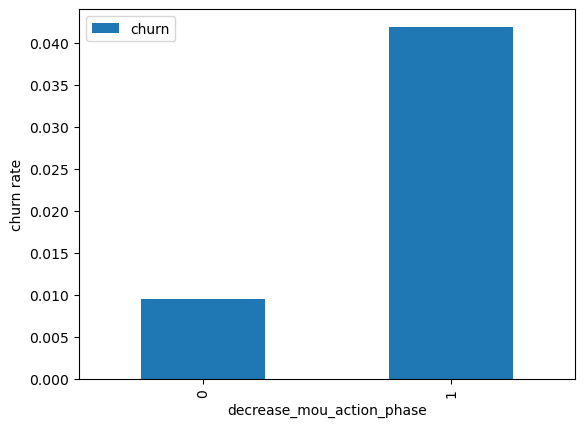

In [53]:
data.pivot_table(values='churn', index='decrease_mou_action_phase', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### churn rate is more for the customers whose minutes of usage decreased in the action phase than the good phase.

In [55]:
# Analysis of Average recharge amount of customers

In [56]:
# Average recharge amount in good phase i.e. average of first two months
data['avg_rech_amt_good_phase'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [57]:
data['difference_rech_amt'] = data['total_rech_amt_8'] - data['avg_rech_amt_good_phase']

In [58]:
# whether recharge amount has decreased in action phase from good phase
data['decrease_rech_amt_action_phase'] = np.where((data['difference_rech_amt'] < 0), 1, 0) 

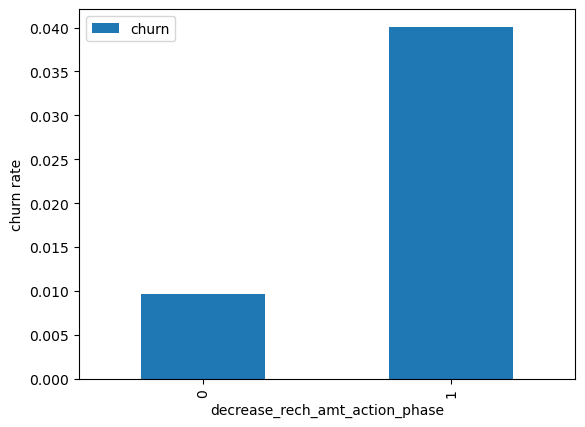

In [59]:
data.pivot_table(values='churn', index='decrease_rech_amt_action_phase', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()    

##### churn rate is more for the customers whose recharge amount has decreased in the action phase than the good phase.

In [61]:
# average recharge number at good phase
data['avg_rech_num_good_phase'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2

In [62]:
data['difference_rech_num'] = data['total_rech_num_8'] - data['avg_rech_num_good_phase']

In [63]:
# whether recharge number has decreased in action phase from good phase
data['decrease_rech_num_action_phase'] = np.where((data['difference_rech_num'] < 0), 1, 0)

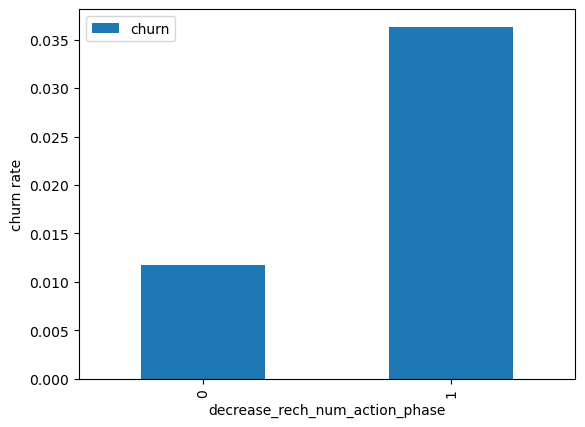

In [64]:
data.pivot_table(values='churn', index='decrease_rech_num_action_phase', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()    

##### churn rate is more for the customers whose number of recharge has decreased in the action phase than the good phase

In [66]:
#Analysis of the average revenue per user
columns_churn = [col for col in data.columns.to_list() if 'arpu' in col]
columns_churn

['arpu_6', 'arpu_7', 'arpu_8']

In [67]:
# average revenue per user at good phase
data['arpu_good_phase'] = (data['arpu_6'] + data['arpu_7'])/2

In [68]:
data['difference_arpu'] = data['arpu_8'] - data['arpu_good_phase']

In [69]:
# whether average revenue per user has decreased in action phase from good phase
data['decrease_arpu_action_phase'] = np.where((data['difference_arpu'] < 0), 1, 0)

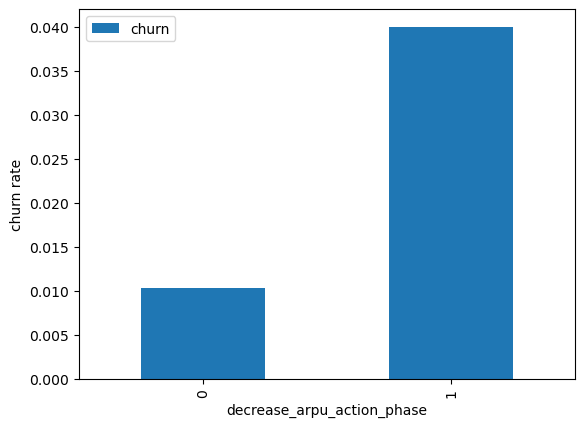

In [70]:
data.pivot_table(values='churn', index='decrease_arpu_action_phase', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()      

##### churn rate is more for the customers whose average revenue per user has decreased in the action phase than the good phase

### Bivariate analysis

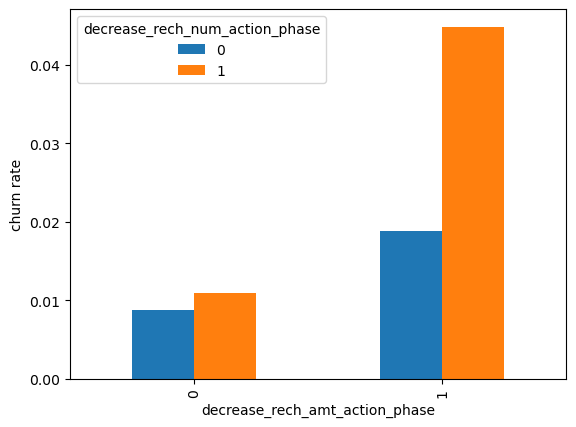

In [73]:
data.pivot_table(values='churn', index='decrease_rech_amt_action_phase', columns='decrease_rech_num_action_phase', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

##### churn rate is more for the customers whose recharge amount as well as number of recharge have decreased in the action phase than the good phase

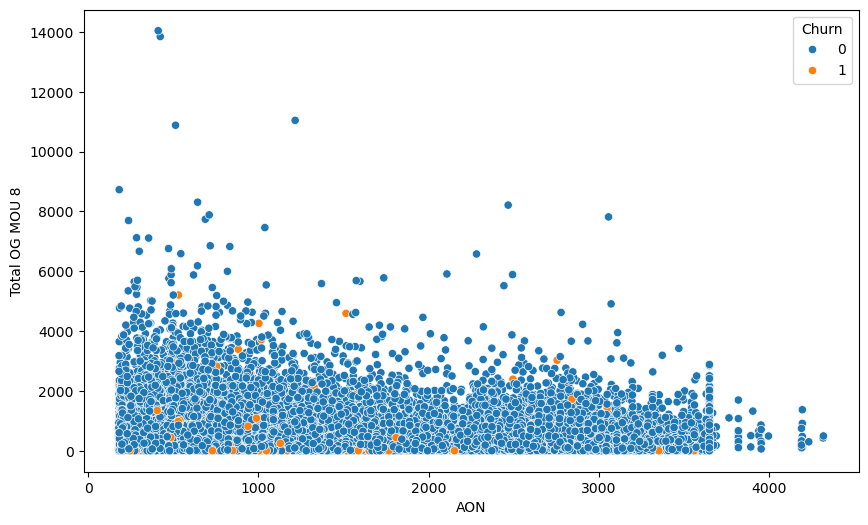

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aon', y='total_og_mou_8', hue='churn', data=data)
plt.xlabel('AON')
plt.ylabel('Total OG MOU 8')
plt.legend(title='Churn')
plt.show()

##### The customers with lesser total_og_mou_8 and age on network are more likely to churn compared to the one with higher total_og_mou_8 and aon

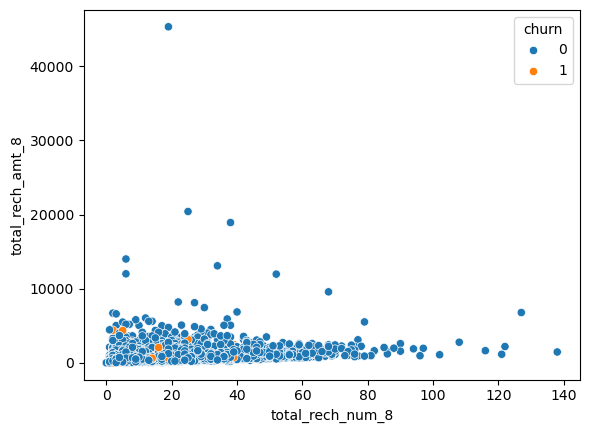

In [77]:
sns.scatterplot(x='total_rech_num_8',y='total_rech_amt_8', hue='churn', data=data)
plt.show()

##### The customers with lesser total_rech_num_8 and total_rech_amt_8 are more likely to churn compared to the one with higher total_rech_num_8 and total_rech_amt_8

In [79]:
missing_percentage = data.isnull().mean() * 100
missing_percentage[missing_percentage > 0]

Series([], dtype: float64)

In [80]:
#Dropping new derived columns
data = data.drop(['total_mou_good_phase', 'avg_mou_action_phase', 'difference_mou', 'decrease_mou_action_phase', 'avg_rech_amt_good_phase', 'difference_rech_amt', 'decrease_rech_amt_action_phase','avg_rech_num_good_phase', 'difference_rech_num', 'decrease_rech_num_action_phase', 'difference_arpu', 'arpu_good_phase', 'decrease_arpu_action_phase'], axis=1)

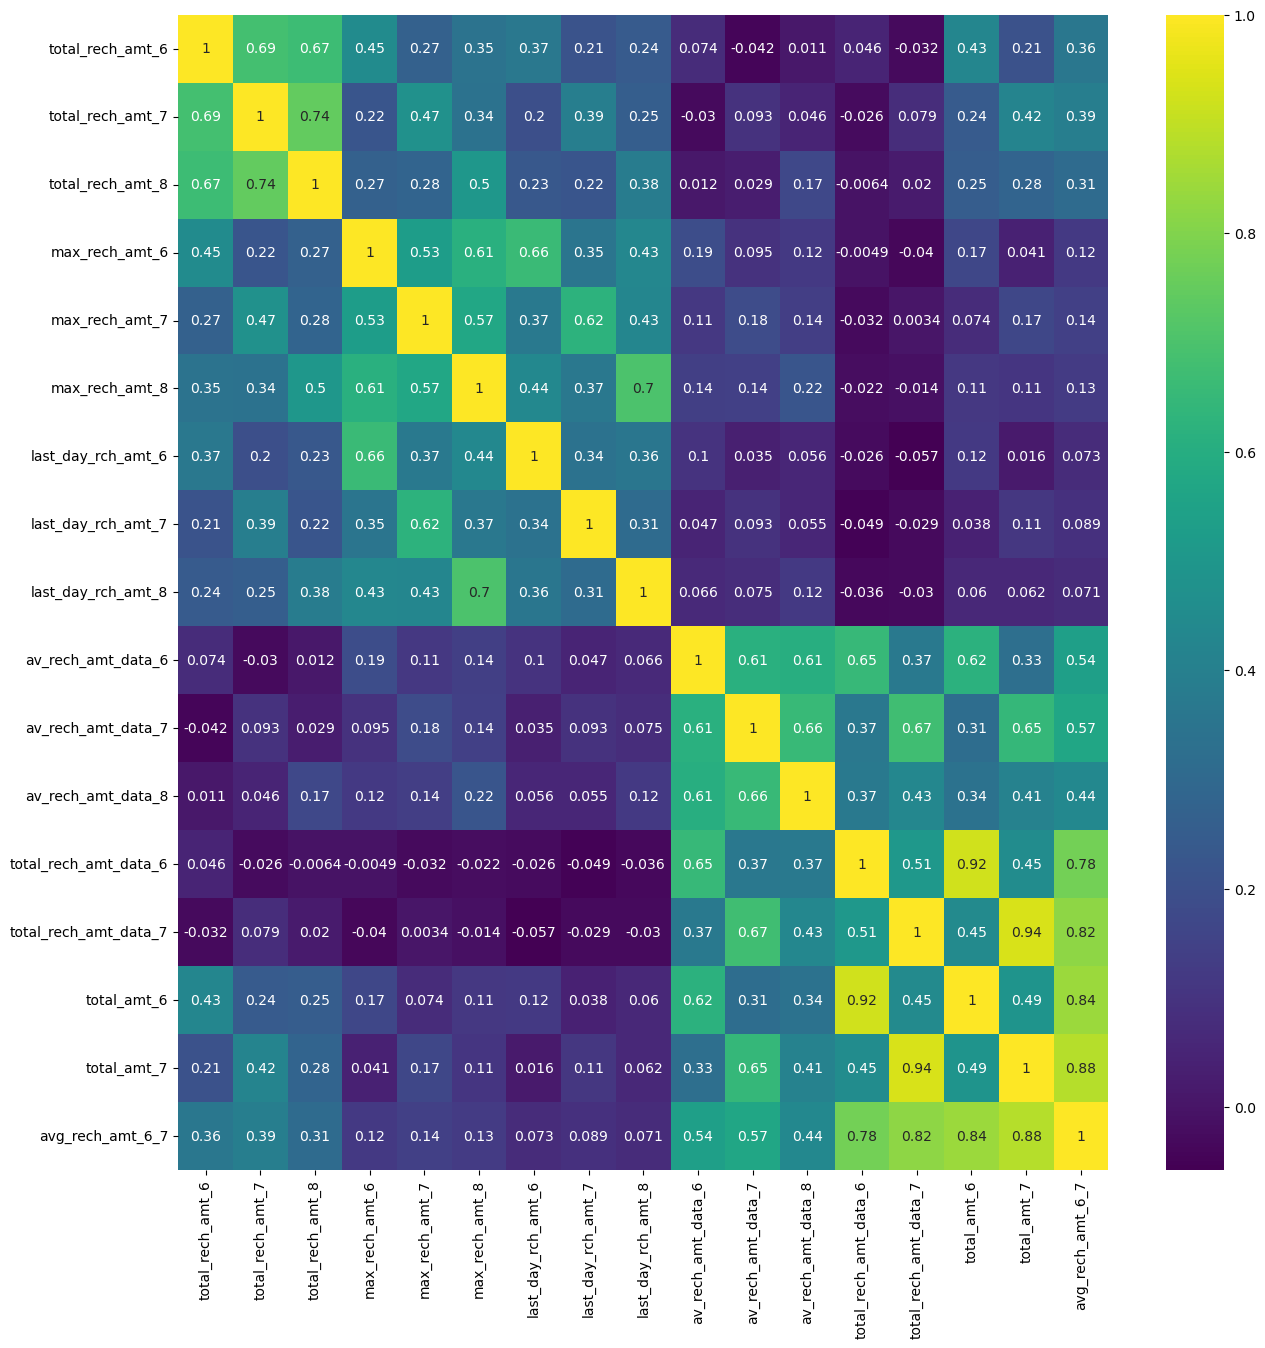

In [81]:
amount_data = data.loc[:, data.columns.str.contains('amt')]
plt.figure(figsize=(15,15))
sns.heatmap(amount_data.corr(), annot=True, cmap='viridis')
plt.show()

In [82]:
list(data.columns)

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [83]:
data = data.drop(['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_amt_6', 'total_amt_7',
 'avg_rech_amt_6_7'], axis=1)

### Train-Test Split

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = data.drop(['mobile_number','churn'], axis=1)

In [87]:
y = data['churn']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size=0.8, test_size=0.2, random_state=42)
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
2536,417.301,264.514,566.796,19.11,16.74,38.83,126.29,118.36,83.08,0.00,0.00,0.00,0.00,0.00,0.00,19.11,16.74,38.83,120.73,116.08,77.59,4.26,1.13,1.34,0.0,0.00,0.00,144.11,133.96,117.78,0.00,0.00,0.00,1.30,1.15,2.28,0.0,0.00,0.00,1.30,1.15,2.28,0.0,0.0,0.0,0.00,0.00,1.85,0.0,0.0,0.0,145.41,135.11,121.91,58.56,32.28,50.31,263.11,205.19,160.86,39.04,10.03,7.13,360.73,247.51,218.31,0.00,0.00,0.00,4.10,8.88,11.41,0.00,0.0,4.18,4.10,8.88,15.59,364.83,256.39,233.91,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,6,6,402,334,794,252,154,252,0,30,0,1.0,1.0,2.0,252.0,154.0,504.0,33.84,292.98,137.97,681.73,50.46,1188.34,0,1,0,0,0,0,1,0,2,0,0,0,4197,1112.04,82.39,538.46
68868,446.741,560.414,578.377,477.66,579.76,711.29,335.69,635.99,445.34,0.00,0.00,0.00,0.00,0.00,0.00,64.26,26.91,31.01,154.04,162.93,159.19,4.06,3.48,7.64,0.0,0.00,1.06,222.38,193.33,197.86,413.39,552.84,680.28,177.58,467.44,276.04,0.0,0.00,0.00,590.98,1020.29,956.33,0.0,0.0,0.0,0.00,5.88,3.51,0.0,0.0,0.0,813.36,1219.51,1157.71,27.41,21.83,20.39,123.84,132.38,45.38,1.11,3.81,13.23,152.38,158.03,79.01,6.59,1.01,1.08,0.71,4.18,0.04,0.00,0.0,0.00,7.31,5.19,1.13,161.43,166.64,81.84,0.49,0.00,0.0,0.00,0.00,0.00,1.23,3.41,1.69,7,9,13,415,689,637,128,128,130,128,0,0,1.0,3.0,3.0,25.0,69.0,71.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,3,3,0,0,0,0,0,0,1130,0.00,0.00,0.00
72468,793.290,473.267,426.268,73.43,35.99,15.91,541.66,372.23,444.96,0.00,0.00,0.00,0.00,0.00,0.00,35.51,8.86,10.14,43.36,28.86,20.71,2.44,3.71,0.16,0.0,0.00,0.00,81.33,41.44,31.03,37.91,27.13,5.76,494.46,339.64,424.08,0.0,0.00,0.00,532.38,366.78,429.84,0.0,0.0,0.0,1.38,0.90,0.00,0.0,0.0,0.0,615.09,409.13,460.88,7.38,4.94,6.79,1.53,1.73,8.98,0.00,0.00,0.00,8.91,6.68,15.78,0.00,0.00,0.00,1.35,0.90,6.31,0.00,0.0,0.00,1.35,0.90,6.31,10.26,7.58,22.09,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,15,10,10,948,557,432,252,252,252,110,128,0,8.0,6.0,8.0,556.0,367.0,413.0,14.96,0.00,0.00,2007.84,1037.81,937.28,0,0,0,6,5,7,1,1,1,1,0,0,540,0.00,0.00,99.16
9349,1625.405,1664.118,1805.427,27.48,420.98,376.74,2066.23,1661.44,1653.31,17.58,1.26,4.55,129.68,2.13,38.73,15.11,377.81,371.31,

### Dealing with data imbalance using SMOTE(Synthetic Minority Oversampling Technique)

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
sm = SMOTE(random_state=27)

In [93]:
X_train.isna().any().any()

False

In [94]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
2536,417.301,264.514,566.796,19.11,16.74,38.83,126.29,118.36,83.08,0.00,0.00,0.00,0.00,0.00,0.00,19.11,16.74,38.83,120.73,116.08,77.59,4.26,1.13,1.34,0.0,0.00,0.00,144.11,133.96,117.78,0.00,0.00,0.00,1.30,1.15,2.28,0.0,0.00,0.00,1.30,1.15,2.28,0.0,0.0,0.0,0.00,0.00,1.85,0.0,0.0,0.0,145.41,135.11,121.91,58.56,32.28,50.31,263.11,205.19,160.86,39.04,10.03,7.13,360.73,247.51,218.31,0.00,0.00,0.00,4.10,8.88,11.41,0.00,0.0,4.18,4.10,8.88,15.59,364.83,256.39,233.91,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,6,6,402,334,794,252,154,252,0,30,0,1.0,1.0,2.0,252.0,154.0,504.0,33.84,292.98,137.97,681.73,50.46,1188.34,0,1,0,0,0,0,1,0,2,0,0,0,4197,1112.04,82.39,538.46
68868,446.741,560.414,578.377,477.66,579.76,711.29,335.69,635.99,445.34,0.00,0.00,0.00,0.00,0.00,0.00,64.26,26.91,31.01,154.04,162.93,159.19,4.06,3.48,7.64,0.0,0.00,1.06,222.38,193.33,197.86,413.39,552.84,680.28,177.58,467.44,276.04,0.0,0.00,0.00,590.98,1020.29,956.33,0.0,0.0,0.0,0.00,5.88,3.51,0.0,0.0,0.0,813.36,1219.51,1157.71,27.41,21.83,20.39,123.84,132.38,45.38,1.11,3.81,13.23,152.38,158.03,79.01,6.59,1.01,1.08,0.71,4.18,0.04,0.00,0.0,0.00,7.31,5.19,1.13,161.43,166.64,81.84,0.49,0.00,0.0,0.00,0.00,0.00,1.23,3.41,1.69,7,9,13,415,689,637,128,128,130,128,0,0,1.0,3.0,3.0,25.0,69.0,71.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,1,3,3,0,0,0,0,0,0,1130,0.00,0.00,0.00
72468,793.290,473.267,426.268,73.43,35.99,15.91,541.66,372.23,444.96,0.00,0.00,0.00,0.00,0.00,0.00,35.51,8.86,10.14,43.36,28.86,20.71,2.44,3.71,0.16,0.0,0.00,0.00,81.33,41.44,31.03,37.91,27.13,5.76,494.46,339.64,424.08,0.0,0.00,0.00,532.38,366.78,429.84,0.0,0.0,0.0,1.38,0.90,0.00,0.0,0.0,0.0,615.09,409.13,460.88,7.38,4.94,6.79,1.53,1.73,8.98,0.00,0.00,0.00,8.91,6.68,15.78,0.00,0.00,0.00,1.35,0.90,6.31,0.00,0.0,0.00,1.35,0.90,6.31,10.26,7.58,22.09,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,15,10,10,948,557,432,252,252,252,110,128,0,8.0,6.0,8.0,556.0,367.0,413.0,14.96,0.00,0.00,2007.84,1037.81,937.28,0,0,0,6,5,7,1,1,1,1,0,0,540,0.00,0.00,99.16
9349,1625.405,1664.118,1805.427,27.48,420.98,376.74,2066.23,1661.44,1653.31,17.58,1.26,4.55,129.68,2.13,38.73,15.11,377.81,371.31,

In [95]:
X_train, y_train = sm.fit_resample(X_train, y_train)

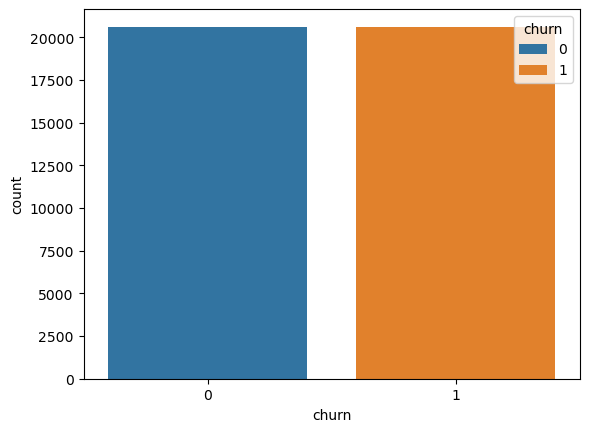

In [96]:
sns.countplot(x=y_train, hue=y_train)
plt.show()

##### data is balanced

### Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
cols_scale = X_train.columns.to_list()

In [102]:
# Fit the train data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [103]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,-0.489905,-0.751389,0.286915,-0.675675,-0.641754,-0.423263,-0.605386,-0.582261,-0.450395,-0.267448,-0.262240,-0.307243,-0.299617,-0.355759,-0.330148,-0.264437,-0.237820,-0.066143,-0.025097,-0.004851,-0.094936,0.005260,-0.175219,-0.142054,-0.287148,-0.258314,-0.236766,-0.177477,-0.166840,-0.107658,-0.574173,-0.542405,-0.385493,-0.560677,-0.534616,-0.379464,-0.134515,-0.116306,-0.111787,-0.804741,-0.751287,-0.511337,-0.038842,-0.034762,-0.031403,-0.367709,-0.350719,-0.179301,-0.214315,-0.013745,-0.011728,-0.848437,-0.784485,-0.497338,0.042623,-0.136347,0.082316,0.839579,0.550759,0.392438,0.801427,-0.008167,-0.042254,0.722002,0.303330,0.304531,-0.203197,-0.196478,-0.182555,-0.313125,-0.217465,-0.097687,-0.122019,-0.126444,0.162251,-0.343567,-0.281982,-0.141939,0.412655,0.092270,0.176065,-0.438203,-0.108674,-0.197907,-0.134330,-0.136128,-0.127547,-0.087085,-0.092616,-0.073289,-0.779056,-0.711116,-0.319862,-0.655624,-0.685666,0.539883,0.609201,-0.015523,0.768731,-0.739243,-0.456092,-0.521445,-0.123836,-0.149174,0.393641,1.027438,0.378105,2.757181,-0.221501,0.728171,0.307802,0.661726,-0.243982,1.402232,-0.293531,2.592570,-0.270673,-0.387664,-0.397849,-0.328473,1.905802,-0.246411,4.054552,-0.185034,-0.176798,-0.145261,3.706507,3.163771,-0.081180,1.334189
1,-0.422395,-0.072759,0.311582,0.116801,0.395561,1.105356,-0.241080,0.349706,0.351797,-0.267448,-0.262240,-0.307243,-0.299617,-0.355759,-0.330148,-0.030272,-0.187739,-0.109153,0.138942,0.237619,0.333340,-0.007469,-0.031832,0.276916,-0.287148,-0.258314,-0.056712,0.070586,0.023281,0.159782,0.173061,0.542180,1.377508,-0.232623,0.366347,0.335794,-0.134515,-0.116306,-0.111787,-0.039514,0.629777,1.142520,-0.038842,-0.034762,-0.031403,-0.367709,-0.056334,-0.071795,-0.214315,-0.013745,-0.011728,-0.020224,0.599136,1.058182,-0.206282,-0.215224,-0.157452,0.039436,0.133547,-0.263781,-0.255749,-0.169058,0.137181,-0.112633,-0.045818,-0.240034,-0.134715,-0.185020,-0.163638,-0.355711,-0.269202,-0.226096,-0.122019,-0.126444,-0.097424,-0.319805,-0.308565,-0.266610,-0.259176,-0.192356,-0.320493,3.022072,-0.108674,-0.197907,-0.134330,-0.136128,-0.12754

In [104]:
#scaling test data
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
16011,-1.041230,-0.284366,0.296796,-0.613597,0.124689,0.489485,-0.562553,-0.058006,1.165348,-0.267448,-0.26224,-0.307243,-0.299617,-0.355759,-0.330148,-0.244366,0.040757,0.048531,-0.481707,-0.274492,-0.383130,-0.265862,-0.244167,-0.231168,-0.287148,0.563859,-0.236766,-0.472605,-0.156176,-0.225948,-0.516259,0.162740,0.601070,-0.334400,0.104824,1.561081,-0.134515,-0.116306,-0.111787,-0.605362,0.184265,1.436108,-0.038842,-0.034762,-0.031403,-0.367709,0.367219,2.617144,-0.214315,-0.013745,0.835640,-0.773384,0.118965,1.204078,-0.172162,0.047144,0.349972,-0.583522,-0.426804,-0.459829,-0.286686,-0.267610,-0.138442,-0.534417,-0.306625,-0.163998,-0.122660,0.075122,-0.168543,-0.354706,0.037694,0.561520,-0.122019,-0.126444,-0.097424,-0.310700,0.057542,0.332170,-0.608601,-0.253911,-0.035757,-0.438203,-0.108674,-0.197907,-0.134330,-0.135965,-0.127547,-0.087085,-0.092616,-0.073289,-0.887933,-0.483920,-0.319862,-0.931740,-0.198232,0.158036,-0.297292,-0.283533,-0.006656,0.110319,0.096915,-0.358578,-0.538906,0.234856,-0.019673,-0.551654,0.479323,-0.322482,-0.334290,-0.116086,-0.178495,-0.322583,-0.313216,-0.281484,-0.293531,2.592570,-0.270673,-0.387664,-0.397849,-0.328473,-0.252606,-0.246411,-0.243082,-0.185034,0.964706,1.061480,-0.735982,-0.307168,-0.318926,-0.311180
87533,0.496812,-0.483113,-0.306920,-0.488076,-0.488005,-0.301011,-0.546286,-0.562943,-0.420434,-0.267448,-0.26224,-0.307243,-0.299617,-0.355759,-0.330148,0.250673,0.059618,0.219580,-0.110884,-0.025501,-0.142225,0.389032,0.212232,-0.167325,-0.287148,-0.258314,-0.236766,0.101202,0.034169,0.034445,-0.557489,-0.497184,-0.380751,-0.476300,-0.518463,-0.317150,-0.134515,-0.116306,-0.006057,-0.733912,-0.708723,-0.465208,-0.038842,-0.034762,-0.031403,-0.367709,-0.350719,-0.299111,0.157035,-0.013745,-0.011728,-0.670073,-0.664318,-0.396239,0.514701,0.026689,0.071257,-0.293272,-0.232151,-0.289296,-0.274144,-0.231914,-0.150502,0.014155,-0.179265,-0.184248,-0.185427,-0.030841,-0.122826,0.407433,0.185968,0.270484,-0.122019,-0.126444,-0.097424,0.093773,0.087223,0.132577,0.057681,-0.046665,-0.074974,-0.438203,-0.108674,-0.197907,0.039694,0.309756,

### Logistic Regression with RFE & Manual Elimination (with No PCA)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [107]:
# Intantiate the logistic regression
logreg = LogisticRegression()

In [108]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_train_no_pca = X_train

In [109]:
# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train_no_pca, y_train)

In [110]:
# RFE selected columns
X_train_no_pca = X_train_no_pca[X_train_no_pca.columns[rfe.support_]]

In [111]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_no_pca)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37425
Model:                            GLM   Df Residuals:                    37409
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8891.4
Date:                Sun, 10 Nov 2024   Deviance:                       17774.
Time:                        16:27:19   Pearson chi2:                 4.50e+15
No. Iterations:                    66   Pseudo R-squ. (CS):             0.5937
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5509.0540   1.89e+05      0.029      0.977   -3.66e+05    3.77e+05
loc_ic_mou_8         -3.8165      0.071    -54.013      0.000      -3.955      -3.678
ic_others_8          -2.6925      0.282     -9.543      0.000      -3.246      -2.140
total_rech_data_6    -0.0633      0.122     -0.520      0.603      -0.302       0.175
total_rech_data_7  4.562e+04    3.9e+06      0.012      0.991   -7.59e+06    7.68e+06
total_rech_data_8  1.084e+05   4.82e+06      0.022      0.982   -9.34e+06    9.56e+06
monthly_2g_7      -6068.6517   5.18e+05     -0.012      0.991   -1.02e+06    1.01e+06
monthly_2g_8       -1.39e+04   6.19e+05     -0.022      0.982   -1.23e+06     1.2e+06
sachet_2g_6          -0.3575      0.122     -2.936      0.003      -0.596      -0.119
sachet_2g_7       -3.898e+04   3.33e+06     -0.012      0.991   -6.56e+06    6.48e+06
sachet_2g_8       -8.935e+04   3.98e+06     -0.022      0.982   -7.88e+06     7.7e+06
monthly_3g_6         -0.5278      0.064     -8.292      0.000      -0.653      -0.403
monthly_3g_7      -8760.9674   7.48e+05     -0.012      0.991   -1.47e+06    1.46e+06
monthly_3g_8      -2.085e+04   9.27e+05     -0.022      0.982   -1.84e+06     1.8e+06
sachet_3g_7       -1.535e+04   1.31e+06     -0.012      0.991   -2.58e+06    2.55e+06
sachet_3g_8       -3.712e+04   1.65e+06     -0.022      0.982   -3.27e+06     3.2e+06
=====================================================================================
"""

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_no_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_no_pca.values, i) for i in range(X_train_no_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_data_8,213.76
9,sachet_2g_8,152.64
3,total_rech_data_7,150.40
8,sachet_2g_7,121.33
14,sachet_3g_8,26.58
13,sachet_3g_7,17.73
2,total_rech_data_6,12.99
7,sachet_2g_6,12.95
12,monthly_3g_8,10.38
11,monthly_3g_7,7.97


In [113]:
#Remove total_rech_data_8 with high VIF and p value

In [114]:
X_train_no_pca.drop('total_rech_data_8', axis = 1, inplace = True)

In [115]:
# Refit the model
X_train_sm = sm.add_constant(X_train_no_pca)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37425
Model:                            GLM   Df Residuals:                    37410
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10004.
Date:                Sun, 10 Nov 2024   Deviance:                       20005.
Time:                        16:27:20   Pearson chi2:                 4.50e+15
No. Iterations:                    36   Pseudo R-squ. (CS):             0.5688
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1927.2795   1.54e+05      0.013      0.990   -2.99e+05    3.03e+05
loc_ic_mou_8         -3.4036      0.061    -56.171      0.000      -3.522      -3.285
ic_others_8          -2.6044      0.252    -10.343      0.000      -3.098      -2.111
total_rech_data_6     0.1773      0.116      1.534      0.125      -0.049       0.404
total_rech_data_7  4.082e+04   3.25e+06      0.013      0.990   -6.33e+06    6.41e+06
monthly_2g_7      -5429.2970   4.32e+05     -0.013      0.990   -8.52e+05    8.41e+05
monthly_2g_8         -1.0525      0.097    -10.796      0.000      -1.244      -0.861
sachet_2g_6          -0.6025      0.115     -5.223      0.000      -0.829      -0.376
sachet_2g_7       -3.487e+04   2.78e+06     -0.013      0.990   -5.47e+06     5.4e+06
sachet_2g_8          -1.1704      0.077    -15.185      0.000      -1.321      -1.019
monthly_3g_6         -0.6214      0.062     -9.978      0.000      -0.744      -0.499
monthly_3g_7      -7837.8247   6.24e+05     -0.013      0.990   -1.23e+06    1.21e+06
monthly_3g_8         -1.1721      0.124     -9.457      0.000      -1.415      -0.929
sachet_3g_7       -1.373e+04   1.09e+06     -0.013      0.990   -2.16e+06    2.13e+06
sachet_3g_8          -1.0407      0.150     -6.920      0.000      -1.335      -0.746
=====================================================================================
"""

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_no_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_no_pca.values, i) for i in range(X_train_no_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_rech_data_7,135.62
7,sachet_2g_7,110.06
12,sachet_3g_7,16.10
2,total_rech_data_6,12.95
6,sachet_2g_6,12.92
10,monthly_3g_7,7.37
4,monthly_2g_7,3.85
9,monthly_3g_6,2.28
8,sachet_2g_8,2.26
11,monthly_3g_8,2.10


In [117]:
#Drop total_rech_data_7 with high VIF and p value

In [118]:
X_train_no_pca.drop('total_rech_data_7', axis = 1, inplace = True)

In [119]:
# Refit the model
X_train_sm = sm.add_constant(X_train_no_pca)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37425
Model:                            GLM   Df Residuals:                    37411
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12359.
Date:                Sun, 10 Nov 2024   Deviance:                       24718.
Time:                        16:27:21   Pearson chi2:                 2.29e+14
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5110
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3327      0.054    -43.390      0.000      -2.438      -2.227
loc_ic_mou_8         -3.6297      0.056    -64.609      0.000      -3.740      -3.520
ic_others_8          -2.6157      0.225    -11.638      0.000      -3.056      -2.175
total_rech_data_6     1.3916      0.093     15.012      0.000       1.210       1.573
monthly_2g_7         -1.1968      0.061    -19.596      0.000      -1.316      -1.077
monthly_2g_8         -1.3284      0.099    -13.407      0.000      -1.523      -1.134
sachet_2g_6          -1.5037      0.088    -17.063      0.000      -1.676      -1.331
sachet_2g_7          -0.1149      0.029     -3.935      0.000      -0.172      -0.058
sachet_2g_8          -1.0311      0.043    -23.805      0.000      -1.116      -0.946
monthly_3g_6         -1.0340      0.062    -16.616      0.000      -1.156      -0.912
monthly_3g_7         -1.1278      0.085    -13.342      0.000      -1.293      -0.962
monthly_3g_8         -1.4090      0.126    -11.220      0.000      -1.655      -1.163
sachet_3g_7          -0.4911      0.050     -9.849      0.000      -0.589      -0.393
sachet_3g_8          -1.0817      0.089    -12.131      0.000      -1.256      -0.907
=====================================================================================
"""

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_no_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_no_pca.values, i) for i in range(X_train_no_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,sachet_2g_6,12.65
2,total_rech_data_6,12.59
6,sachet_2g_7,2.67
11,sachet_3g_7,2.36
8,monthly_3g_6,2.26
9,monthly_3g_7,2.24
7,sachet_2g_8,2.21
10,monthly_3g_8,2.10
12,sachet_3g_8,1.89
3,monthly_2g_7,1.57


In [121]:
# drop sachet_2g_6 due to high VIF
X_train_no_pca.drop('sachet_2g_6', axis = 1, inplace = True)

In [122]:
# Refit the model
X_train_sm = sm.add_constant(X_train_no_pca)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37425
Model:                            GLM   Df Residuals:                    37412
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12534.
Date:                Sun, 10 Nov 2024   Deviance:                       25069.
Time:                        16:27:21   Pearson chi2:                 6.48e+12
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5064
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2873      0.052    -43.793      0.000      -2.390      -2.185
loc_ic_mou_8         -3.6617      0.056    -65.218      0.000      -3.772      -3.552
ic_others_8          -2.5737      0.223    -11.559      0.000      -3.010      -2.137
total_rech_data_6    -0.0932      0.026     -3.568      0.000      -0.144      -0.042
monthly_2g_7         -1.0674      0.059    -18.012      0.000      -1.184      -0.951
monthly_2g_8         -1.2021      0.096    -12.483      0.000      -1.391      -1.013
sachet_2g_7          -0.2130      0.028     -7.646      0.000      -0.268      -0.158
sachet_2g_8          -1.0463      0.042    -24.794      0.000      -1.129      -0.964
monthly_3g_6         -0.6976      0.056    -12.414      0.000      -0.808      -0.587
monthly_3g_7         -1.0867      0.082    -13.234      0.000      -1.248      -0.926
monthly_3g_8         -1.3452      0.123    -10.921      0.000      -1.587      -1.104
sachet_3g_7          -0.1228      0.036     -3.385      0.001      -0.194      -0.052
sachet_3g_8          -0.9165      0.085    -10.832      0.000      -1.082      -0.751
=====================================================================================
"""

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_no_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_no_pca.values, i) for i in range(X_train_no_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,sachet_2g_7,2.50
8,monthly_3g_7,2.24
6,sachet_2g_8,2.19
9,monthly_3g_8,2.10
2,total_rech_data_6,2.01
7,monthly_3g_6,1.91
10,sachet_3g_7,1.91
11,sachet_3g_8,1.89
3,monthly_2g_7,1.54
4,monthly_2g_8,1.53


In [124]:
#VIF is less than 5 and p-values are below 0.05

In [125]:
#Making predictions on the train dataset
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.000009
1    0.183112
2    0.000091
3    0.077796
4    0.000042
5    0.011744
6    0.000775
7    0.693644
8    0.000008
9    0.231610
dtype: float64

In [126]:
y_train_pred = y_train_pred.values.reshape(-1)

In [130]:
train=pd.DataFrame({'Actual':y_train.values, 'Predicted_prob':y_train_pred})
train["Predicted"]=np.where(train["Predicted_prob"]>0.5,1,0)
train.head(20)

,Actual,Predicted_prob,Predicted
0,0,9.381112e-06,0
1,0,1.831122e-01,0
2,0,9.143059e-05,0
3,0,7.779557e-02,0
4,0,4.168916e-05,0
5,0,1.174371e-02,0
6,0,7.753570e-04,0
7,0,6.936437e-01,1
8,0,8.460635e-06,0
9,0,2.316103e-01,0


In [140]:
from sklearn import metrics
print("Train Accuracy =", metrics.accuracy_score(train["Actual"], train["Predicted"]))

Train Accuracy = 0.8532798931195725


In [142]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve(train.Actual, train.Predicted_prob, drop_intermediate = False )

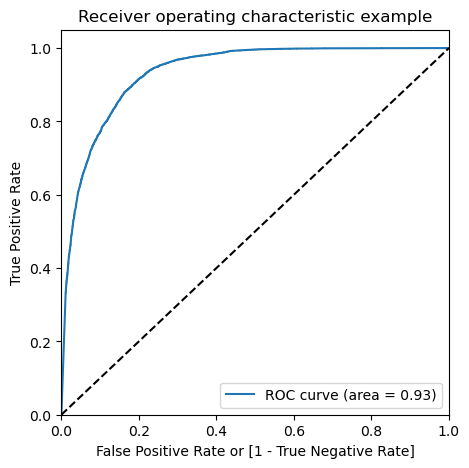

In [146]:
# Call the ROC function
draw_roc(train.Actual, train.Predicted_prob)

In [148]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train[i]= train.Predicted_prob.map(lambda x: 1 if x > i else 0)
train.head()

,Actual,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.183112,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000091,0,1,0,0,0,0,0,0,0,0,0
3,0,0.077796,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000042,0,1,0,0,0,0,0,0,0,0,0


In [150]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train.Actual, train[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.449058,1.000000,0.000000
0.1,0.1,0.789980,0.980067,0.635045
0.2,0.2,0.820922,0.968464,0.700664
0.3,0.3,0.837782,0.953648,0.743344
0.4,0.4,0.848283,0.934488,0.778020
0.5,0.5,0.853280,0.903963,0.811970
0.6,0.6,0.854669,0.863382,0.847568
0.7,0.7,0.846199,0.796501,0.886706
0.8,0.8,0.818063,0.668095,0.940298
0.9,0.9,0.550942,0.000000,1.000000


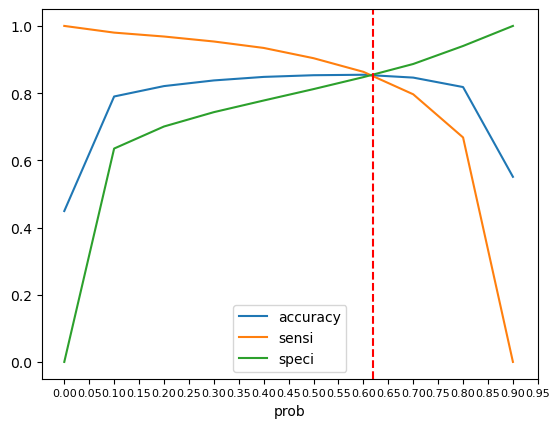

In [152]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.62, color='r', linestyle='--') # additing axline

plt.show()

In [154]:
train['final_predicted'] = train.Predicted_prob.map( lambda x: 1 if x > 0.62 else 0)
train.head()

,Actual,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.183112,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000091,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.077796,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000042,0,1,0,0,0,0,0,0,0,0,0,0


In [156]:
print("Train Accuracy =", metrics.accuracy_score(train["Actual"], train["final_predicted"]))

Train Accuracy = 0.8531997327989312


In [158]:
confusion = metrics.confusion_matrix(train.Actual, train.final_predicted )
#true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [160]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.8511245983577294
Specificity : 0.8548911198409235
False Positive Rate : 0.14510888015907658
Negative predictive value : 0.8757017238809678
Recall : 0.8511245983577294


In [162]:
from sklearn.metrics import precision_score, recall_score

In [164]:
precision_score(train.Actual, train.final_predicted)

0.8270120259019427

In [166]:
recall_score(train.Actual, train.final_predicted)

0.8511245983577294

In [168]:
X_test_sm=sm.add_constant(X_test[X_train_no_pca.columns])
X_test_sm

,const,loc_ic_mou_8,ic_others_8,total_rech_data_6,monthly_2g_7,monthly_2g_8,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_7,sachet_3g_8
16011,1.0,-0.163998,-0.073289,-0.538906,2.592570,-0.270673,-0.397849,-0.328473,-0.252606,-0.246411,-0.243082,0.964706,1.061480
87533,1.0,-0.184248,-0.073289,1.121375,-0.295017,-0.270673,-0.397849,-0.328473,4.064210,1.753726,1.905735,-0.176798,-0.145261
642,1.0,-0.222364,-0.073289,-0.538906,-0.295017,-0.270673,-0.397849,-0.328473,-0.252606,-0.246411,-0.243082,-0.176798,-0.145261
68160,1.0,-0.388196,-0.014262,-0.123836,5.480157,2.951493,-0.397849,-0.328473,1.905802,-0.246411,-0.243082,-0.176798,-0.145261
28875,1.0,-0.547226,-0.073289,-0.123836,-0.295017,-0.270673,-0.397849,-0.328473,1.905802,-0.246411,1.905735,-0.176798,-0.145261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89258,1.0,-0.380651,-0.073289,-0.538906,-0.295017,-0.270673,-0.397849,-0.328473,-0.252606,-0.246411,-0.243082,-0.176798,-0.145261
13873,1.0,-0.516499,-0.073289,-0.123836,-0.295017,-0.270673,-0.397849,-0.328473,1.905802,1.753726,1.905735,-0.176798,-0.145261
8261,1.0,0.693427,-0.073289,0.291235,-0.295017,-0.270673,-0.397849,-0.328473,4.064210,5.753999,4.054552,-0.176798,-0.145261
3613,1.0,-0.376195,0.989186,0.706305,-0.295017,-0.270673,3.647815,-0.328473,-0.252606,-0.246411,-0.243082,-0.176798,-0.145261


In [170]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

16011    0.022275
87533    0.000495
642      0.681440
68160    0.000031
28875    0.076917
21375    0.004897
28045    0.826499
84429    0.000008
46934    0.035654
86177    0.269698
dtype: float64

In [172]:
y_test_pred = y_test_pred.values.reshape(-1)

In [174]:
test=pd.DataFrame({'Actual':y_test.values, 'Predicted_prob':y_test_pred})
test["Predicted"]=np.where(test["Predicted_prob"]>0.62,1,0)
test.head()

,Actual,Predicted_prob,Predicted
0,0,0.022275,0
1,0,0.000495,0
2,0,0.681440,1
3,0,0.000031,0
4,0,0.076917,0


In [176]:
print("Test Accuracy =", metrics.accuracy_score(test["Actual"], test["Predicted"]))

Test Accuracy = 0.8509715148085267


In [178]:
confusion_test = metrics.confusion_matrix(test.Actual, test.Predicted )
#true positive
TP = confusion_test[1,1]
# true negatives
TN = confusion_test[0,0]
# false positives
FP = confusion_test[0,1] 
# false negatives
FN = confusion_test[1,0]

In [180]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.696551724137931
Specificity : 0.8553141970519783
False Positive Rate : 0.14468580294802172
Negative predictive value : 0.9901212393354288
Recall : 0.696551724137931


In [182]:
from sklearn.metrics import precision_recall_curve

In [184]:
p, r, thresholds = precision_recall_curve(train.Actual, train.Predicted_prob)

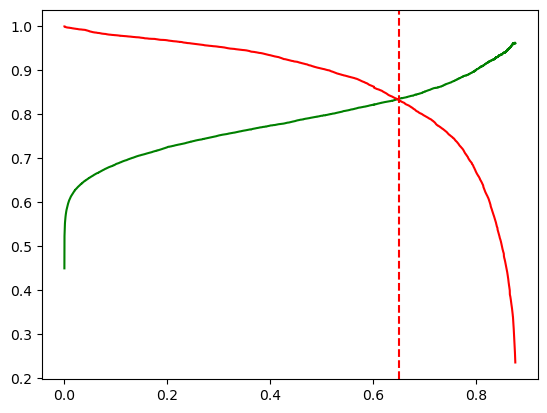

In [186]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.65, color='r', linestyle='--') # additing axline

plt.show()

In [188]:
train['final_predicted'] = train.Predicted_prob.map( lambda x: 1 if x > 0.65 else 0)
train.head()

,Actual,Predicted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.183112,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000091,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.077796,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000042,0,1,0,0,0,0,0,0,0,0,0,0


In [190]:
print("Train Accuracy =", metrics.accuracy_score(train["Actual"], train["final_predicted"]))

Train Accuracy = 0.8508216432865732


In [192]:
confusion = metrics.confusion_matrix(train.Actual, train.final_predicted )
#true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [194]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.8320242770439129
Specificity : 0.8661428779281245
False Positive Rate : 0.13385712207187545
Negative predictive value : 0.8635044966637656
Recall : 0.8320242770439129


In [196]:
test["final_predicted"]=np.where(test["Predicted_prob"]>0.65,1,0)
test.head()

,Actual,Predicted_prob,Predicted,final_predicted
0,0,0.022275,0,0
1,0,0.000495,0,0
2,0,0.681440,1,1
3,0,0.000031,0,0
4,0,0.076917,0,0


In [198]:
print("Test Accuracy =", metrics.accuracy_score(test["Actual"], test["final_predicted"]))

Test Accuracy = 0.8615355593284286


In [200]:
confusion_test = metrics.confusion_matrix(test.Actual, test.final_predicted )
#true positive
TP = confusion_test[1,1]
# true negatives
TN = confusion_test[0,0]
# false positives
FP = confusion_test[0,1] 
# false negatives
FN = confusion_test[1,0]

In [202]:
# Calculating the sensitivity
print("Sensitivity :",TP/(TP+FN))

# Calculating the specificity
print("Specificity :",TN/(TN+FP))

# Calculate false postive rate 
print("False Positive Rate :",FP/ float(TN+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

#Recall
print ("Recall :",TP / float(TP + FN))

Sensitivity : 0.6827586206896552
Specificity : 0.8665632273079907
False Positive Rate : 0.13343677269200932
Negative predictive value : 0.9898094816127603
Recall : 0.6827586206896552


In [204]:
res.params.sort_values(ascending=False)

total_rech_data_6   -0.093232
sachet_3g_7         -0.122806
sachet_2g_7         -0.213046
monthly_3g_6        -0.697576
sachet_3g_8         -0.916465
sachet_2g_8         -1.046288
monthly_2g_7        -1.067445
monthly_3g_7        -1.086724
monthly_2g_8        -1.202149
monthly_3g_8        -1.345200
const               -2.287262
ic_others_8         -2.573661
loc_ic_mou_8        -3.661700
dtype: float64

### Model summary for logistic regression without PCA

Train: Accuracy:- 0.8508216432865732 \
Sensitivity : 0.8320242770439129 \
Specificity : 0.8661428779281245

Test: Accuracy:- 0.8615355593284286 \
Sensitivity:- 0.6827586206896552 \
Specificity:- 0.8665632273079907 

### Reduce the number of variables using PCA

In [217]:
from sklearn.decomposition import PCA

In [219]:
pca = PCA(random_state=42)
X_train = X_train.dropna()
y_train = y_train[X_train.index]

In [221]:
pca_components = pca.fit_transform(X_train)
pca_components

array([[ 1.83929551e+00, -4.71421759e+00,  1.57451051e+00, ...,
         1.35667349e-06,  7.70890485e-07,  6.83567497e-07],
       [-6.00547990e-01,  1.28787818e+00,  9.39631233e-02, ...,
         4.87808094e-06,  4.27411086e-06, -7.68493785e-07],
       [-8.24756266e-01, -4.22027838e+00,  5.01615823e+00, ...,
        -1.28806927e-06,  9.72154714e-06, -4.20236338e-07],
       ...,
       [-8.41767059e-02,  2.45022959e-01, -3.84891899e-02, ...,
         6.23086025e-07,  8.05793666e-07,  1.58129779e-06],
       [-2.55472136e+00,  2.36296309e-01, -1.05467876e+00, ...,
         3.01922173e-06,  5.79198185e-06, -2.00413694e-06],
       [-2.98578712e+00, -8.39626889e-01, -2.06235840e-01, ...,
        -2.25544940e-06,  3.48331328e-06, -8.55803043e-07]])

In [223]:
pca.explained_variance_ratio_

array([1.10550246e-01, 9.28939089e-02, 5.57875857e-02, 4.77845317e-02,
       3.84044555e-02, 3.62599521e-02, 3.21085375e-02, 2.98730657e-02,
       2.59997629e-02, 2.56199476e-02, 2.33557826e-02, 2.22072535e-02,
       2.15357960e-02, 2.04114441e-02, 1.94286451e-02, 1.81714312e-02,
       1.64891375e-02, 1.62162672e-02, 1.38904430e-02, 1.38087511e-02,
       1.25278263e-02, 1.23526731e-02, 1.15380249e-02, 1.06043116e-02,
       1.03018072e-02, 9.95282481e-03, 9.48038951e-03, 9.24207086e-03,
       8.79416143e-03, 8.50907249e-03, 7.96559868e-03, 7.74386967e-03,
       7.63539361e-03, 6.95607035e-03, 6.87816394e-03, 6.62388171e-03,
       6.56630872e-03, 6.49922531e-03, 6.31562366e-03, 6.11827484e-03,
       5.99619989e-03, 5.84705650e-03, 5.62099120e-03, 5.43865528e-03,
       5.28913857e-03, 4.90285133e-03, 4.62812776e-03, 4.33593907e-03,
       4.26139454e-03, 4.19117114e-03, 4.08328456e-03, 3.68739539e-03,
       3.59222720e-03, 3.51550467e-03, 3.48200807e-03, 3.36024899e-03,
      

In [225]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

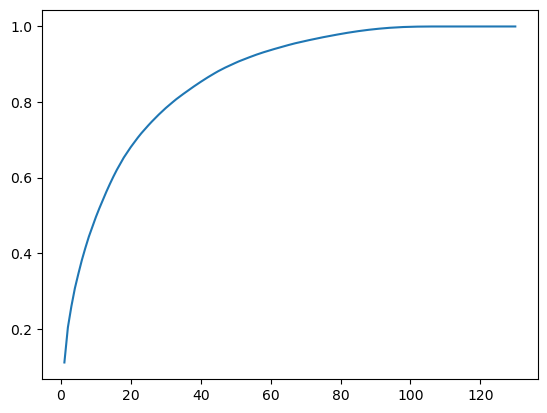

In [227]:
# Making the scree plot
import matplotlib.pyplot as plt
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

##### more than 90% variance of the data is explained by 60 components

In [230]:
from sklearn.decomposition import IncrementalPCA

In [232]:
pca_final = IncrementalPCA(n_components=60)

In [234]:
X_train_pca = pca_final.fit_transform(X_train)

In [236]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [238]:
X_test_pca = pca_final.transform(X_test)

#### Logistic regression with PCA
Applying logistic regression on the data on our Principal components

In [240]:
from sklearn.linear_model import LogisticRegression

In [242]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [244]:
learner_pca = LogisticRegression()

In [246]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [248]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089855,0.015532,0.003123,0.001050,0.01,{'C': 0.01},0.916742,0.908900,0.908411,0.913172,0.903925,0.910230,0.004379,6,0.910299,0.911944,0.912291,0.910432,0.910618,0.911117,0.000830
1,0.119821,0.003629,0.003173,0.000915,0.10,{'C': 0.1},0.918239,0.907396,0.910805,0.912877,0.906854,0.911234,0.004144,4,0.910968,0.913353,0.913257,0.911177,0.911365,0.912024,0.001054
2,0.164022,0.020996,0.003051,0.000862,1.00,{'C': 1},0.918838,0.906194,0.911104,0.912877,0.907733,0.911349,0.004430,1,0.911190,0.913650,0.912811,0.911550,0.912037,0.912248,0.000887
3,0.167322,0.003030,0.002356,0.000506,10.00,{'C': 10},0.919137,0.905893,0.910805,0.912877,0.907733,0.911289,0.004607,2,0.910671,0.913650,0.912885,0.911699,0.911664,0.912114,0.001040
4,0.171739,0.014377,0.002715,0.000884,100.00,{'C': 100},0.919137,0.905292,0.910207,0.912581,0.907733,0.910990,0.004746,5,0.910893,0.913427,0.912885,0.911773,0.911589,0.912114,0.000917
5,0.190387,0.016600,0.003190,0.000883,1000.00,{'C': 1000},0.919137,0.905893,0.910506,0.913172,0.907733,0.911288,0.004637,3,0.910819,0.913576,0.912811,0.911773,0.911440,0.912084,0.000986


In [250]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9113490952676851 at C = 1


In [252]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [254]:
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

In [256]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [258]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18099  2520]
 [ 1479 15327]]


In [260]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [262]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

sensitivity = TP / float(TP+FN)
print("Sensitivity:-",TP / float(TP+FN))

Specificity = TN / float(TN+FP)
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8931462925851703
Sensitivity:- 0.9119957158157801
Specificity:- 0.877782627673505


In [264]:
y_test_pred = log_pca_model.predict(X_test_pca)

In [266]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4486  670]
 [  38  107]]


In [268]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [270]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

sensitivity = TP / float(TP+FN)
print("Sensitivity:-",TP / float(TP+FN))

Specificity = TN / float(TN+FP)
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8664402942840973
Sensitivity:- 0.7379310344827587
Specificity:- 0.8700543056633049


In [272]:
"{:2.2}".format(metrics.roc_auc_score(y_test, y_test_pred))

'0.8'

In [274]:
"{:2.2}".format(metrics.roc_auc_score(y_train, y_train_pred))

'0.89'

#### Model summary for logistic regression with PCA

Train:
Accuracy:- 0.8931462925851703 \
Sensitivity:- 0.9119957158157801 \
Specificity:- 0.877782627673505

Test:
Accuracy:- 0.8664402942840973 \
Sensitivity:- 0.7379310344827587 \
Specificity:- 0.8700543056633049

#### Decision tree with PCA

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [280]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [282]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.778736,0.019240,0.002468,0.000486,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.880690,0.854805,0.936626,0.882475,0.859012,0.882722,0.029159,5
1,0.777205,0.003676,0.002423,0.000226,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.880690,0.854805,0.936626,0.882475,0.859012,0.882722,0.029159,5
2,0.780561,0.001947,0.002853,0.000475,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.877120,0.855698,0.937816,0.883071,0.856633,0.882067,0.029919,7
3,0.781616,0.003546,0.002550,0.000211,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.877120,0.855698,0.937816,0.883071,0.856633,0.882067,0.029919,7
4,1.308384,0.027315,0.002600,0.000295,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.875930,0.920262,0.923535,0.927998,0.939322,0.917409,0.021719,2
5,1.298774,0.028890,0.002754,0.000348,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.876822,0.920262,0.922940,0.927998,0.939322,0.917469,0.021346,1
6,1.224212,0.029208,0.002648,0.000214,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.850342,0.912526,0.912526,0.897352,0.892029,0.892955,0.022813,3
7,1.222121,0.025601,0.002541,0.000206,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.850342,0.912526,0.912526,0.897352,0.892029,0.892955,0.022813,3


In [284]:
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9174686508876976
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [286]:
# Model with optimal hyperparameters
pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [288]:
y_train_pred = pca_model.predict(X_train_pca)

In [290]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [292]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9222979291917167
Sensitivity:- 0.9374628109008687
Specificity:- 0.9099374363451186


In [294]:
# Prediction on the test set
y_test_pred = pca_model.predict(X_test_pca)

In [296]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [298]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8860592341067723
Sensitivity:- 0.6482758620689655
Specificity:- 0.8927463149728472


#### Model summary for Decision tree with PCA

Train:
Accuracy:- 0.9222979291917167 \
Sensitivity:- 0.9374628109008687 \
Specificity:- 0.9099374363451186

Test:
Accuracy:- 0.8860592341067723 \
Sensitivity:- 0.6482758620689655 \
Specificity:- 0.8927463149728472

#### Support Vector Machine with PCA

In [302]:
from sklearn.svm import SVC

In [304]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [309]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.045280,0.111047,4.897541,0.271501,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.949339,0.953908,0.948216,0.950488,0.002461,5,0.955471,0.954148,0.954228,0.954616,0.000605
1,6.433897,0.096192,6.419655,0.118010,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.895792,0.902285,0.899078,0.899051,0.002651,10,0.900922,0.899359,0.900321,0.900200,0.000644
2,8.263361,0.067699,8.540071,0.158159,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.881764,0.889860,0.884729,0.885451,0.003344,12,0.887695,0.884168,0.885892,0.885919,0.001440
3,4.316615,0.311344,3.580600,0.794942,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.970501,0.970421,0.970421,0.970448,0.000038,3,0.979559,0.979158,0.979399,0.979372,0.000165
4,5.801523,0.107979,5.210107,0.058907,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.917515,0.922244,0.916152,0.918637,0.002611,7,0.923126,0.920160,0.924048,0.922445,0.001659
5,6.628601,0.045453,6.306036,0.046603,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.890501,0.895391,0.892906,0.892933,0.001996,11,0.894148,0.892144,0.893467,0.893253,0.000832
6,5.114412,0.212291,1.937401,0.134251,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.978597,0.980040,0.979800,0.979479,0.000631,1,0.993507,0.993747,0.993547,0.993601,0.000105
7,6.583844,0.294439,4.115360,0.122538,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.944369,0.949018,0.942846,0.945411,0.002625,6,0.951182,0.950782,0.951984,0.951316,0.000500
8,6.534046,0.119182,5.624886,0.089479,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.898517,0.905010,0.899479,0.901002,0.002861,9,0.903928,0.901082,0.903006,0.902672,0.001186
9,7.046061,0.462968,1.438867,0.078313,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.978116,0.980441,0.979158,0.979238,0.000951,2,0.999118,0.998878,0.999038,0.999011,0.000100


In [311]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

In [313]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

In [314]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [315]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [316]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9052237808951236
Sensitivity:- 0.9341901701773176
Specificity:- 0.8816140452980261


In [318]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [319]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [320]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8768156951518581
Sensitivity:- 0.7379310344827587
Specificity:- 0.880721489526765


#### Model summary for Support Vector Machine with PCA
Train: Accuracy:- 0.9052237808951236 \
Sensitivity:- 0.9341901701773176 \
Specificity:- 0.8816140452980261

Test: Accuracy:- 0.8768156951518581 \
Sensitivity:- 0.7379310344827587 \
Specificity:- 0.880721489526765

### **Summarizing**
#### Model 1 : Logistic Regression with RFE & Manual Elimination 

**Train Set**: \
Accuracy:- 0.8508216432865732 \
Sensitivity : 0.8320242770439129 \
Specificity : 0.8661428779281245

**Test Set**: \
Accuracy:- 0.8615355593284286 \
Sensitivity:- 0.6827586206896552 \
Specificity:- 0.8665632273079907 

#### Important predictor attributes which help the business understand indicators of churn:

In [385]:
table = {
    'Feature': [
        'total_rech_data_6', 'sachet_3g_7', 'sachet_2g_7', 'monthly_3g_6', 'sachet_3g_8', 
        'sachet_2g_8', 'monthly_2g_7', 'monthly_3g_7', 'monthly_2g_8', 'monthly_3g_8', 
        'ic_others_8', 'loc_ic_mou_8'
    ],
    'Coefficient': [
        -0.093232, -0.122806, -0.213046, -0.697576, -0.916465, 
        -1.046288, -1.067445, -1.086724, -1.202149, -1.345200, 
        -2.573661, -3.661700
    ]
}
df = pd.DataFrame(table)
df

,Feature,Coefficient
0,total_rech_data_6,-0.093232
1,sachet_3g_7,-0.122806
2,sachet_2g_7,-0.213046
3,monthly_3g_6,-0.697576
4,sachet_3g_8,-0.916465
5,sachet_2g_8,-1.046288
6,monthly_2g_7,-1.067445
7,monthly_3g_7,-1.086724
8,monthly_2g_8,-1.202149
9,monthly_3g_8,-1.345200



#### Model 2: logistic regression with PCA

**Train Set**: \
Accuracy:- 0.8931462925851703 \
Sensitivity:- 0.9119957158157801 \
Specificity:- 0.877782627673505

**Test Set**: \
Accuracy:- 0.8664402942840973 \
Sensitivity:- 0.7379310344827587 \
Specificity:- 0.8700543056633049

**Insights: This model improves recall for churners slightly in the test set, but interpretation of important features is lost due to PCA. However, the model's high sensitivity on training data suggests it is adept at identifying potential churners.**



#### Model 3: Decision tree with PCA

**Train Set**: \
Accuracy:- 0.9222979291917167 \
Sensitivity:- 0.9374628109008687 \
Specificity:- 0.9099374363451186

**Test Set**: \
Accuracy:- 0.8860592341067723 \
Sensitivity:- 0.6482758620689655 \
Specificity:- 0.8927463149728472

**Insights: The model performs well in training but has a significant drop in sensitivity on the test set. It’s possibly overfitting due to the flexibility of decision trees, especially when combined with PCA, which may have masked critical patterns relevant to churn prediction.**



#### Model 4: Support Vector Machine with PCA
**Train Set**: \
Accuracy:- 0.9052237808951236 \
Sensitivity:- 0.9341901701773176 \
Specificity:- 0.8816140452980261

**Test Set**: \
Accuracy:- 0.8768156951518581 \
Sensitivity:- 0.7379310344827587 \
Specificity:- 0.880721489526765

**Insights: This model offers a balance in recall and specificity without significantly sacrificing either. The SVM may be effective for detecting churners while maintaining reasonable overall performance.**

### **Model Selection and Business Recommendations**

**For the primary goal of identifying churners accurately**: Model 2 (Logistic Regression with PCA) and Model 4 (SVM with PCA) provide good sensitivity and generalizability on the test set. Between the two, SVM (Model 4) has a more balanced performance, making it a strong candidate for churn prediction.

**For the interpretation of churn indicators**: Model 1 is the best choice, providing a clear view of significant churn indicators, including data recharge behavior and call usage. This information is valuable for crafting specific retention strategies, such as targeting users with reduced recharge frequency or those using fewer data services.

### **Recommended Strategies for Retention**

1. Target customers with low recharge amounts (especially in June) by offering loyalty programs, discounts, or bonuses to increase spending and prevent churn.

2. Users who have low 3G or 2G usage in the action phase (August) are at a higher risk of churn. Provide special offers on 3G/2G data packages, discounts for upgrading to higher-tier data plans, or bundling of 3G/2G with voice calls to prevent churn. Target these users with personalized plans based on their past data usage patterns.

3. Customers with declining usage from June to August are at higher risk. Offer tailored service packages, reminders about unused data bundles, and encourage regular recharges.

4. Low local incoming call usage in August indicates disengagement. Offer plans that enhance local call benefits, targeting customers with declining call activity.

5. For customers showing signs of churn (low 3G/2G usage and recharge behavior), send personalized retention messages with loyalty rewards, tailored service plans, and special recharge options.